# Mushrooms ML competition

A solution using `predict_proba` and the ROC curve.

## 1. Import libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import confusion_matrix


from sklearn.ensemble import RandomForestClassifier

## 2. Read, manipulate and split data

In [104]:
url = 'https://drive.google.com/file/d/1Op1vQftBKN1lrPVGGLJU-UOlv_dScTup/view?usp=sharing' # train.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
mush = pd.read_csv(path)

In [105]:
mush.head()

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,Id,poisonous
0,k,e,False,w,w,v,6573,1
1,f,e,True,p,w,y,4426,0
2,b,w,False,w,w,s,7018,0
3,k,g,False,w,w,n,5789,0
4,f,n,True,p,g,v,6187,0


In [106]:
mush.drop('Id',axis=1,inplace=True)

In [107]:
X = mush.drop(columns=['poisonous'])
y = mush['poisonous']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=8)
X_train.head()

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population
1725,f,g,True,w,p,y
1260,f,g,True,g,g,v
4551,x,y,False,p,b,y
2442,f,c,False,w,n,v
6109,x,g,True,g,w,v


## 3. Pipeline

### 3.1 Lazypredict


In [108]:
# pip install lazypredict

In [109]:
import lazypredict
from lazypredict.Supervised import LazyClassifier


# Initialize and fit LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the performance of each model
models

100%|██████████| 29/29 [00:15<00:00,  1.93it/s]

[LightGBM] [Info] Number of positive: 2518, number of negative: 2681
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 5199, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484324 -> initscore=-0.062725
[LightGBM] [Info] Start training from score -0.062725


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreeClassifier,0.91,0.92,0.92,0.91,0.03
LGBMClassifier,0.91,0.91,0.91,0.91,0.23
BaggingClassifier,0.91,0.91,0.91,0.91,0.11
XGBClassifier,0.91,0.91,0.91,0.91,1.14
DecisionTreeClassifier,0.91,0.91,0.91,0.91,0.05
RandomForestClassifier,0.91,0.91,0.91,0.91,1.98
ExtraTreesClassifier,0.91,0.91,0.91,0.91,0.41
LabelPropagation,0.91,0.91,0.91,0.91,0.95
LabelSpreading,0.91,0.91,0.91,0.91,1.38


### 3.2 Preprocessing


We have chosen the `RandomForestClassifier()` as our model but you can try any other classifier.

In [110]:
cat_col= list(X_train.select_dtypes(include=["object"]))
cat_col

['cap.shape',
 'cap.color',
 'stalk.color.above.ring',
 'stalk.color.below.ring',
 'population']

In [111]:
categorical_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))
])

full_processor = ColumnTransformer(transformers=[
    ('category', categorical_pipeline, cat_col)
])

### 3.3 Model - Random Forest

In [112]:
rf_pipeline = Pipeline(steps=[
    ('processor', full_processor),
    ('model', RandomForestClassifier(n_estimators=500, random_state=123))
])

In [113]:
_ = rf_pipeline.fit(X_train, y_train)

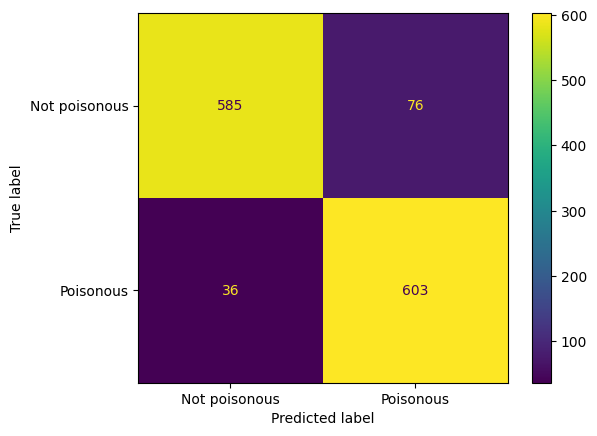

In [114]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    rf_pipeline, X_test, y_test, display_labels=['Not poisonous', 'Poisonous']);

### 3.4 Model - Lable Propagation

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.semi_supervised import LabelPropagation
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer

lab_pipeline = Pipeline(steps=[
    ('processor', full_processor),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),  # Convert to dense array
    ('model', LabelPropagation())
])

lab_train = lab_pipeline.fit(X_train, y_train)


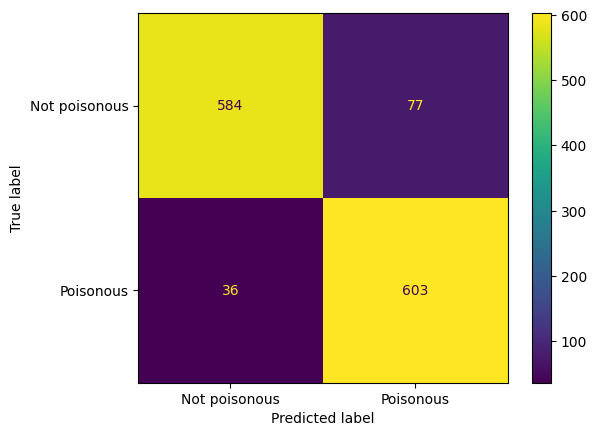

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    lab_pipeline, X_test, y_test, display_labels=['Not poisonous', 'Poisonous']);

### 3.5 Model - LGBM

In [26]:
# pip install lightgbm

In [27]:
from lightgbm import LGBMClassifier

lgbm_pipeline = Pipeline(steps=[
    ('processor', full_processor),
    ('model', LGBMClassifier(random_state=123))
])

In [28]:
lgbm_train = lgbm_pipeline.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2518, number of negative: 2681
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 5199, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484324 -> initscore=-0.062725
[LightGBM] [Info] Start training from score -0.062725


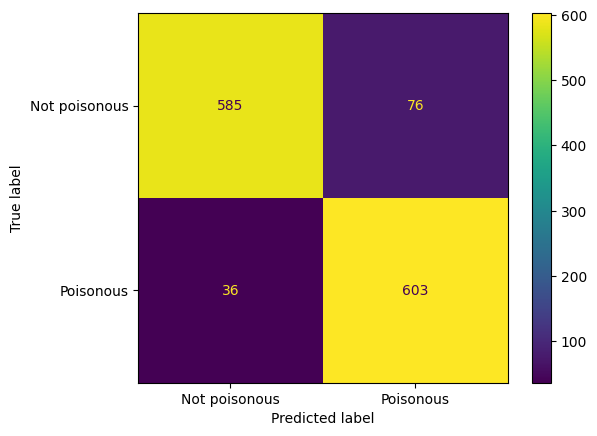

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    lgbm_pipeline, X_test, y_test, display_labels=['Not poisonous', 'Poisonous']);

### 3.6 Model - KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline(steps=[
    ('processor', full_processor),
    ('model', KNeighborsClassifier())
])

In [34]:
knn_train = knn_pipeline.fit(X_train, y_train)

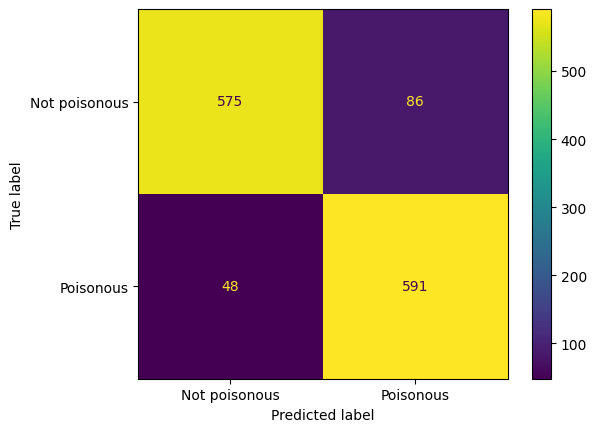

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    knn_pipeline, X_test, y_test, display_labels=['Not poisonous', 'Poisonous']);

### 3.7 Model - SVC

In [36]:
from sklearn.svm import SVC

svc_pipeline = Pipeline(steps=[
    ('processor', full_processor),
    ('model', SVC())
])

In [37]:
svc_train = svc_pipeline.fit(X_train, y_train)

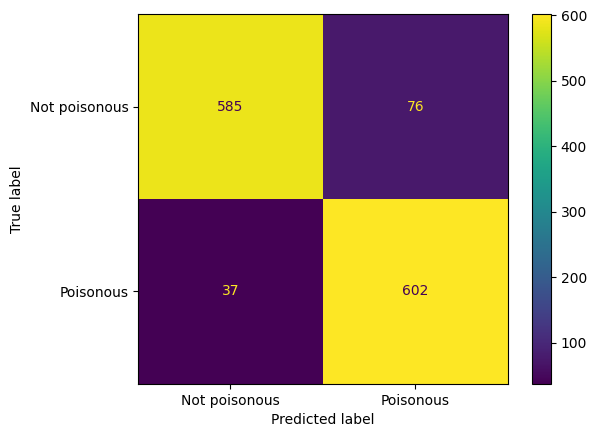

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    svc_pipeline, X_test, y_test, display_labels=['Not poisonous', 'Poisonous']);

In [39]:

Poisonous = [603, 603, 603, 591, 602]
Not_Poisonous = [585, 584, 585, 575, 585 ]
False_Positive = [76, 77, 76, 86, 76 ]
False_Negative = [36, 36, 36, 48, 37 ]
Test_Accuracy = [0.91 , 0.91 , 0.91, 0.90, 0.91]


Scores = pd.DataFrame([Poisonous, Not_Poisonous, False_Positive, False_Negative, Test_Accuracy],
                      columns=["RandomForest", "Lable Propagation", "LGBM",  "KNN", "SVC"],
                      index=["Poisonous", "Not Poisonous", "False Positive", "False Negative", "Test Accuracy"])


Scores

,RandomForest,Lable Propagation,LGBM,KNN,SVC
Poisonous,603.00,603.00,603.00,591.00,602.00
Not Poisonous,585.00,584.00,585.00,575.00,585.00
False Positive,76.00,77.00,76.00,86.00,76.00
False Negative,36.00,36.00,36.00,48.00,37.00
Test Accuracy,0.91,0.91,0.91,0.90,0.91


The confusion matrix shows that our model predicted 36 False negatives, which means 36 poisonous mushrooms will be predicted as non-poisonous. Our task is to avoid these situations at all costs, so we need to find a way to make that left-bottom corner of confusion matrix to be 0.

## 4. Probabilities with `predict_proba()`

In [41]:
rf_proba = rf_pipeline.predict_proba(X_test)
pd.DataFrame(rf_proba)

,0,1
0,0.59,0.41
1,1.00,0.00
2,0.15,0.85
3,0.00,1.00
4,0.13,0.87
...,...,...
1295,1.00,0.00
1296,0.15,0.85
1297,1.00,0.00
1298,1.00,0.00


The `rf_proba` array has a shape of (1300,2):
* 1300 is a number of mushroooms in our X-test set  
* 2 is a number of classes, in our case 0 and 1 (non-poisonous and poisonous)  

The first column holds the values of probabilites for a mushroom being class 0  
The second column holds the values of probabilites for a mushroom being class 1

In [42]:
rf_proba = rf_proba[:,1]
# if we select only the second column we will select all probabilities for our test mushrooms to be poisonous

## 5. ROC and threshold selection

In [43]:
from sklearn.metrics import roc_curve

rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_proba)

We can create a dataframe with fpr, tpr and threshold arrays that we got from roc_curve function and visualize the roc plot as well.

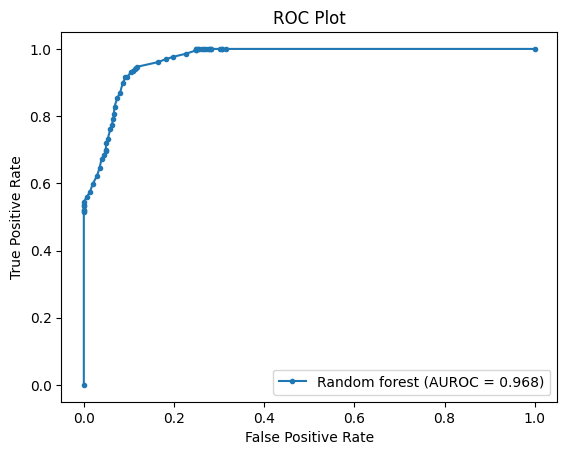

In [44]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test,rf_proba)

plt.plot(rf_fpr, rf_tpr, marker='.', label='Random forest (AUROC = %0.3f)' % rf_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

We can see on above ROC plot that True positive rate becomes 1 when False positive rate is around 0.3. Let's see what is the value of threshold when True positive rate is 1.

In [45]:
win_threshold = pd.DataFrame({'fpr':rf_fpr,'tpr':rf_tpr,'threshold':rf_threshold})
win_threshold

,fpr,tpr,threshold
0,0.00,0.00,2.00
1,0.00,0.51,1.00
2,0.00,0.52,1.00
3,0.00,0.52,1.00
4,0.00,0.53,0.93
5,0.00,0.54,0.91
6,0.00,0.54,0.90
7,0.01,0.56,0.87
8,0.01,0.57,0.86
9,0.02,0.60,0.85


Lets take one row of above DataFrame to explain the values

In [46]:
win_threshold.loc[15]

fpr         0.05
tpr         0.70
threshold   0.81
Name: 15, dtype: float64

Since our task is to NOT predict poisonous as non-poisonous, which means, we should have 0 False negatives, our True positive rate has to be 1 (100% of poisonous get labeled as poisonous).  
Visually examining the above DataFrame we can se that TPR is increasing from 0 to 1 and finally reaches 1 in the row 40. In that same row, the threshold value is `0.25`, and that is the one we will choose to filter our results.

In [92]:
win_threshold_value= win_threshold.threshold[54]
win_threshold_value

0.0

In [93]:
win_threshold[win_threshold.tpr==1].sort_values("threshold", ascending=False).head(1)

,fpr,tpr,threshold
40,0.25,1.00,0.25


## 6. Adjusting the predictions based on treshold value - X-test

The following code is filtering predicted values based on the probability
of a sample being a class 1 (of a mushroom to be poisonous) that `predicted_proba()` returned.

If a value is higher than the threshold it will set prediction as 1 (poisonous). Only if a probability is lower than the threshold it will predicted as 0 (non-poisonous).

In [94]:
predicted_proba = rf_pipeline.predict_proba(X_test)

predicted = (predicted_proba [:,1] >= win_threshold_value).astype('int')

In [95]:
# just the sample so you can see how values are set based on predicted_proba values:
print(f'Probability: {predicted_proba [:5,1]}')
print(f'Set value: {predicted[:5]}')

Probability: [0.40969587 0.         0.84841232 1.         0.86745138]
Set value: [1 1 1 1 1]


## 7. Confusion matrix of adjusted results

In [96]:
#from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, predicted)

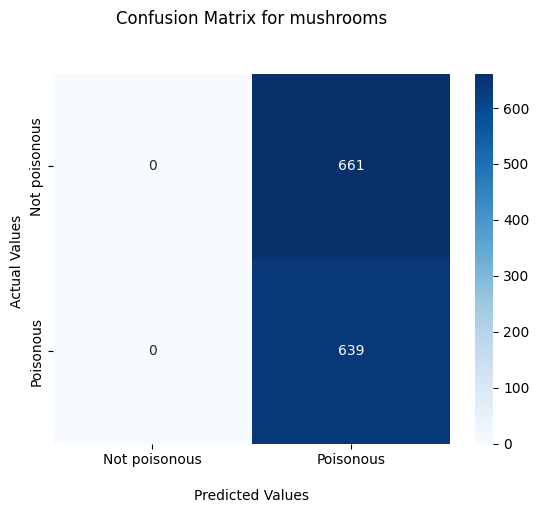

In [97]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix for mushrooms\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not poisonous','Poisonous'])
ax.yaxis.set_ticklabels(['Not poisonous','Poisonous'])

## Display the visualization of the Confusion Matrix.
plt.show()

## 8. Adjusting the predictions based on threshold value - test

In [98]:
url = 'https://drive.google.com/file/d/16S9TzU3JkhwlGhXczibK9f2UbgNaHdM3/view?usp=sharing' # test.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
mush_test = pd.read_csv(path)

In [99]:
mush_test.set_index('Id',inplace=True)

Now we can do the same on a real test set that we want to predict:

In [100]:
predicted_proba_test = rf_pipeline.predict_proba(mush_test)
predicted_test = (predicted_proba_test [:,1] >= win_threshold_value).astype('int')

## 9. Creating a submission file

In [101]:
submission_file = pd.DataFrame({'Id': mush_test.index, 'poisonous': pd.Series(predicted_test)})
submission_file

,Id,poisonous
0,5165,1
1,4281,1
2,231,1
3,3890,1
4,1521,1
...,...,...
1620,983,1
1621,7055,1
1622,7456,1
1623,5132,1


In [102]:
submission_file.to_csv('submission_final.csv', index=None )
# Extras needed on colab
from google.colab import files
files.download("submission_final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>